In [1]:
import jax.numpy as jnp
from jax import vmap, lax
import matplotlib.pyplot as plt

In [2]:
# 2D RPF
vel_std_x = 0.03587739169597626
vel_std_y = 0.0006851413054391742
noise_std = 0.0003
dx = 0.025

vel_std = vel_std_y
res = jnp.sqrt(vel_std**2 + noise_std**2)
print("Smoothing std using vel y component: ", res)

vel_std = jnp.sqrt(jnp.mean(jnp.array([vel_std_x, vel_std_y])**2))
res = jnp.sqrt(vel_std**2 + noise_std**2)
print("Smoothing std using isotropic vel: ", res)

Smoothing std using vel y component:  0.0007479429
Smoothing std using isotropic vel:  0.025375545


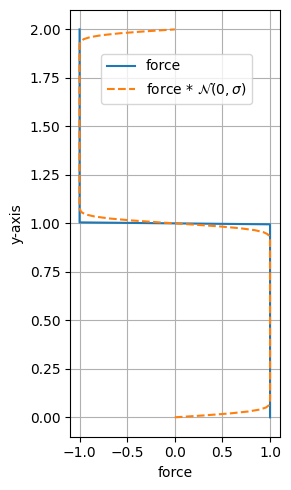

In [3]:
def force_rpf2d(r):
    return jnp.where(
        r[1] > 1.0,
        jnp.array([-1.0, 0.0]),
        jnp.array([1.0, 0.0]),
    )

def force_rpf2d_smooth(r):
    """Smoothed version of the force function above using the error function"""
    sigma = 0.025 # normalization_stats["velocity"]["std"]
    erf_mitte = lax.erf((r[1] - 1) / (jnp.sqrt(2) *sigma))
    erf_left = lax.erf(r[1] / (jnp.sqrt(2) *sigma)) 
    erf_right = lax.erf((r[1] - 2) / (jnp.sqrt(2) *sigma)) 
    res = erf_left + erf_right - erf_mitte
    return jnp.array([res, 0.0])

r = jnp.array([[0, 1]]) * jnp.linspace(0, 2, 200)[:, None]
f = vmap(force_rpf2d)(r) 
f_smooth = vmap(force_rpf2d_smooth)(r) 

fig = plt.figure(figsize=(3,5))
plt.plot(f[:, 0], r[:, 1], label="force")
plt.plot(f_smooth[:, 0], r[:, 1], "--", label=r"force * $\mathcal{N}(0, \sigma)$")
plt.xlabel("force")
plt.ylabel("y-axis")
plt.grid()
plt.legend(loc=(0.15, 0.78))
plt.tight_layout()
plt.savefig("rpf_force_smooth.pdf")

In [4]:
# 3D RPF
vel_std = jnp.sqrt(jnp.mean(jnp.array([
    0.07390083372592926,
    0.0014004298718646169,
    0.0011365190148353577])**2
))
noise_std = 0.0003
dx = 0.05

res = jnp.sqrt(vel_std**2 + noise_std**2)
print("Smoothing std using isotropic vel: ", res)

Smoothing std using isotropic vel:  0.042680427
